In [5]:
!pip3 install pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import pandas as pd
import json
import matplotlib.pyplot as plt

pd.set_option("display.expand_frame_repr", False)

Making sure the notebook is readable, similar to A1. 

In [43]:
# 1. Read dataset
player_data_set = pd.read_csv("NBA_PLAYER_DATASET.csv")
# print(player_data_set.head())
# 2. Get number of rows and columns
rows, cols = player_data_set.shape

# 3. Get class counts (sorted by class name for consistency)
class_counts = player_data_set["TEAM_ABBREVIATION"].value_counts().sort_index().to_dict()

print(class_counts)

# 4. Build output dictionary
summary = {
    "Total number of rows": int(rows),
    "Total number of columns": int(cols),
    "Class counts": {cls: int(count) for cls, count in class_counts.items()}
}

# 5. Save to JSON
with open("data_summary.json", "w") as f:
    json.dump(summary, f, indent=4)


{'AND': 16, 'ATL': 934, 'BAL': 120, 'BKN': 255, 'BLT': 142, 'BOM': 58, 'BOS': 1189, 'BUF': 120, 'CAP': 14, 'CHA': 367, 'CHH': 243, 'CHI': 935, 'CHP': 13, 'CHS': 59, 'CHZ': 16, 'CIN': 192, 'CLE': 941, 'CLR': 18, 'DAL': 773, 'DEF': 15, 'DEN': 808, 'DET': 1075, 'DN ': 15, 'FTW': 121, 'GOS': 385, 'GSW': 499, 'HOU': 897, 'HUS': 20, 'IND': 768, 'INO': 50, 'JET': 25, 'KCK': 192, 'LAC': 715, 'LAL': 988, 'MEM': 454, 'MIA': 630, 'MIH': 63, 'MIL': 952, 'MIN': 589, 'MNL': 143, 'NJN': 606, 'NOH': 161, 'NOJ': 77, 'NOK': 34, 'NOP': 229, 'NYK': 1218, 'NYN': 18, 'OKC': 305, 'ORL': 612, 'PHI': 536, 'PHL': 498, 'PHW': 203, 'PHX': 911, 'PIT': 17, 'POR': 867, 'PRO': 58, 'ROC': 100, 'SAC': 678, 'SAN': 331, 'SAS': 494, 'SDC': 95, 'SDR': 51, 'SEA': 606, 'SFW': 119, 'SHE': 17, 'STL': 168, 'SYR': 165, 'TCB': 39, 'TOR': 555, 'TOT': 2572, 'UTA': 469, 'UTH': 253, 'VAN': 98, 'WAS': 918, 'WAT': 21}


The output of data_summary shows that there are a total of 29916 player seasons (a lot). The next code snippet shows the structure of the data set. In summary, this data set does not give performance metrics such as points per game, assists per game, etc. 

We will need to do that ourselves.

In [27]:
print("This is the header of the dataset: \n")
print(list(player_data_set.columns))
print("\nThis is the first 5 rows of the dataset, showing one player's statistics for a 5 different seasons:\n")
print(player_data_set.head())

This is the header of the dataset: 

['PLAYER_ID', 'Name', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

This is the first 5 rows of the dataset, showing one player's statistics for a 5 different seasons:

   PLAYER_ID            Name SEASON_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP    GS     MIN  FGM  ...  FT_PCT   OREB   DREB    REB  AST   STL   BLK   TOV   PF  PTS
0      76001  Alaa Abdelnaby   1990-91  1610612757               POR        23.0  43   0.0   290.0   55  ...   0.568   27.0   62.0   89.0   12   4.0  12.0  22.0   39  135
1      76001  Alaa Abdelnaby   1991-92  1610612757               POR        24.0  71   1.0   934.0  178  ...   0.752   81.0  179.0  260.0   30  25.0  16.0  66.0  132  432
2      76001  Alaa Abdelnaby   1992-93  1610612749               MIL        25.0  12   0.0   159.0   26  ... 

Let's explore how to navigate this data. For example, let's focus on Stephen Curry's season statistics from 2009 (from when he was drafted) to 2019. This is basically printing raw data.

In [26]:
# Filter for Stephen Curry and seasons between 2011 and 2019
curry_stats = player_data_set[
    (player_data_set["Name"] == "Stephen Curry") &
    (player_data_set["SEASON_ID"].between("2009-10", "2018-19"))
]

# Show the results of a few selected key performance metrics
print(curry_stats[["SEASON_ID", "TEAM_ABBREVIATION", "GP", "PTS", "AST", "REB", "FG_PCT", "FG3_PCT", "FT_PCT"]])


     SEASON_ID TEAM_ABBREVIATION  GP   PTS  AST    REB  FG_PCT  FG3_PCT  FT_PCT
6040   2009-10               GSW  80  1399  472  356.0   0.462    0.437   0.885
6041   2010-11               GSW  74  1373  432  286.0   0.480    0.442   0.934
6042   2011-12               GSW  26   383  138   88.0   0.490    0.455   0.809
6043   2012-13               GSW  78  1786  539  314.0   0.451    0.453   0.900
6044   2013-14               GSW  78  1873  666  334.0   0.471    0.424   0.885
6045   2014-15               GSW  80  1900  619  341.0   0.487    0.443   0.914
6046   2015-16               GSW  79  2375  527  430.0   0.504    0.454   0.908
6047   2016-17               GSW  79  1999  524  353.0   0.468    0.411   0.898
6048   2017-18               GSW  51  1346  310  261.0   0.495    0.423   0.921
6049   2018-19               GSW  69  1881  361  369.0   0.472    0.437   0.916


In order to make more advanced analysis, we will have to manipulate this data. For example, we can calculate Stephen Curry's points per game, based on which the ordering of his season's (e.g. 1st season, 2nd season etc.)

In [29]:
# 1) Filter Curry and make a working copy
curry = player_data_set[player_data_set["Name"] == "Stephen Curry"].copy()

# 2) Parse season start year from SEASON_ID (e.g. "2018-19" -> 2018) and sort chronologically
curry["SEASON_START"] = curry["SEASON_ID"].astype(str).str[:4].astype(int)
curry = curry.sort_values("SEASON_START")

# 3) Assign ordered season number within his career
curry["SEASON_NUMBER"] = range(1, len(curry) + 1)

# 4) Per-game stats (safe divide)
curry["PPG"] = curry["PTS"] / curry["GP"].where(curry["GP"] != 0, pd.NA)
curry["APG"] = curry["AST"] / curry["GP"].where(curry["GP"] != 0, pd.NA)
curry["RPG"] = curry["REB"] / curry["GP"].where(curry["GP"] != 0, pd.NA)
curry["MPG"] = curry["MIN"] / curry["GP"].where(curry["GP"] != 0, pd.NA)

# 5) Display tidy view
cols = ["SEASON_NUMBER", "SEASON_ID", "TEAM_ABBREVIATION", "GP", "MPG", "PPG", "APG", "RPG", "FG_PCT", "FG3_PCT", "FT_PCT"]
curry_display = curry[cols]

curry_display


,SEASON_NUMBER,SEASON_ID,TEAM_ABBREVIATION,GP,MPG,PPG,APG,RPG,FG_PCT,FG3_PCT,FT_PCT
6040,1,2009-10,GSW,80,36.200000,17.487500,5.900000,4.450000,0.462,0.437,0.885
6041,2,2010-11,GSW,74,33.635135,18.554054,5.837838,3.864865,0.480,0.442,0.934
6042,3,2011-12,GSW,26,28.153846,14.730769,5.307692,3.384615,0.490,0.455,0.809
6043,4,2012-13,GSW,78,38.243590,22.897436,6.910256,4.025641,0.451,0.453,0.900
6044,5,2013-14,GSW,78,36.487179,24.012821,8.538462,4.282051,0.471,0.424,0.885
6045,6,2014-15,GSW,80,32.662500,23.750000,7.737500,4.262500,0.487,0.443,0.914
6046,7,2015-16,GSW,79,34.177215,30.063291,6.670886,5.443038,0.504,0.454,0.908
6047,8,2016-17,GSW,79,33.405063,25.303797,6.632911,4.468354,0.468,0.411,0.898
6048,9,2017-18,GSW,51,31.980392,26.392157,6.078431,5.117647,0.495,0.423,0.921
6049,10,2018-19,GSW,69,33.782609,27.260870,5.231884,5.347826,0.472,0.437,0.916


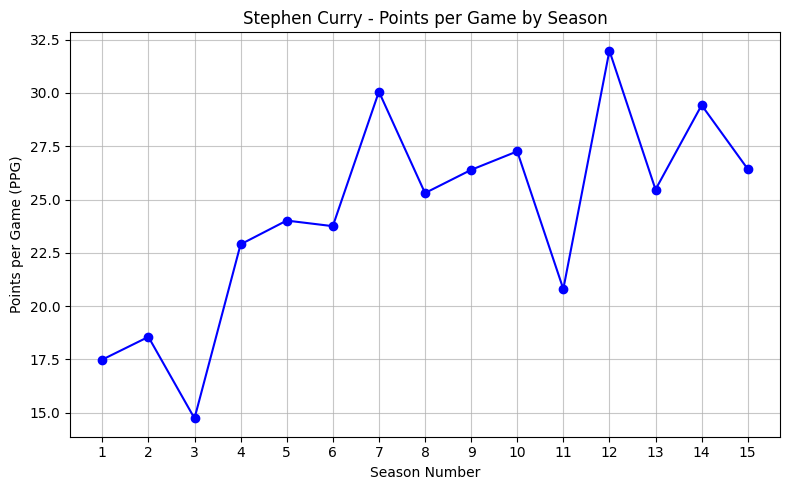

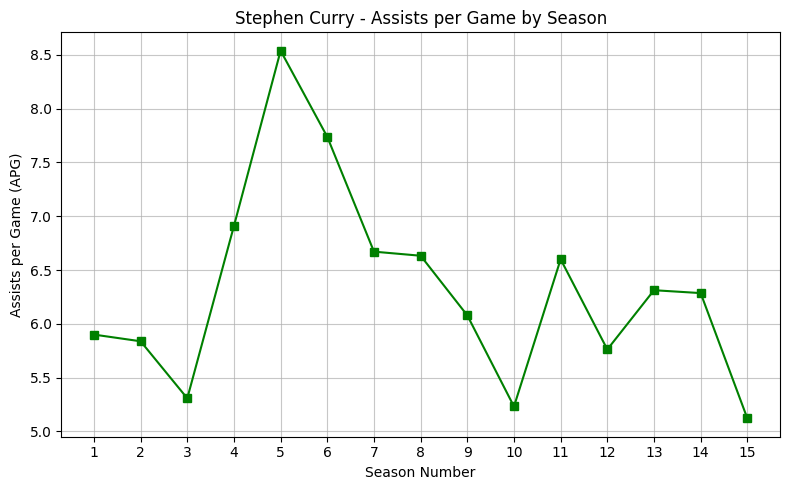

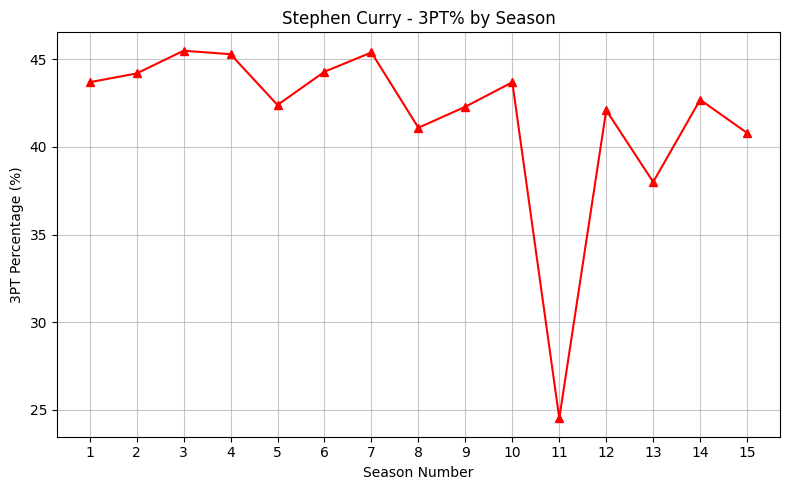

In [39]:
## Now create a plot, showing Curry's points per game vs. season number.

# --- Figure 1: Points per Game ---
plt.figure(figsize=(8,5))
plt.plot(curry["SEASON_NUMBER"], curry["PPG"], marker="o", linestyle="-", color="blue")
plt.title("Stephen Curry - Points per Game by Season")
plt.xlabel("Season Number")
plt.ylabel("Points per Game (PPG)")
plt.xticks(curry["SEASON_NUMBER"])
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

# --- Figure 2: Assists per Game ---
plt.figure(figsize=(8,5))
plt.plot(curry["SEASON_NUMBER"], curry["APG"], marker="s", linestyle="-", color="green")
plt.title("Stephen Curry - Assists per Game by Season")
plt.xlabel("Season Number")
plt.ylabel("Assists per Game (APG)")
plt.xticks(curry["SEASON_NUMBER"])
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()

# --- Figure 3: 3PT% ---
plt.figure(figsize=(8,5))
plt.plot(curry["SEASON_NUMBER"], curry["FG3_PCT"]*100, marker="^", linestyle="-", color="red")
plt.title("Stephen Curry - 3PT% by Season")
plt.xlabel("Season Number")
plt.ylabel("3PT Percentage (%)")
plt.xticks(curry["SEASON_NUMBER"])
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()



In [35]:
print(curry["SEASON_NUMBER"])


6040     1
6041     2
6042     3
6043     4
6044     5
6045     6
6046     7
6047     8
6048     9
6049    10
6050    11
6051    12
6052    13
6053    14
6054    15
Name: SEASON_NUMBER, dtype: int64


Now import all nba data. Each season the best 15 players are voted in. These top players are ranked into 1st Team (best 5 players), 2nd Team, and 3rd Team All-NBA. This makes this a good task for classifcation algorithms. We can investigate which in-season personal statistics have the greatest impact on the winning these awards.lets 

In [41]:
# 3. Read All-NBA dataset
all_nba_raw = pd.read_csv("all_nba.csv")

# 4. Reshape All-NBA dataset
# Keep only Season, Tm (1st/2nd/3rd), and player slots
tidy_all_nba = all_nba_raw.melt(
    id_vars=["Season", "Tm"], 
    value_vars=[col for col in all_nba_raw.columns if col in ["C","F","F.1","G","G.1"]],
    var_name="Position", value_name="Name"
)

# Clean up
tidy_all_nba = tidy_all_nba.dropna(subset=["Name"])
tidy_all_nba = tidy_all_nba[["Season", "Name", "Tm"]].rename(columns={"Tm": "All_NBA_Team"})

print("Tidied All-NBA data:")
print(tidy_all_nba.head())

Tidied All-NBA data:
    Season                  Name All_NBA_Team
0  2024-25        Nikola Jokić C          1st
1  2024-25         Evan Mobley C          2nd
2  2024-25  Karl-Anthony Towns C          3rd
3  2023-24        Nikola Jokić C          1st
4  2023-24       Anthony Davis C          2nd


In [46]:
# 5. Merge player dataset with All-NBA labels
merged = pd.merge(
    player_data_set,
    tidy_all_nba,
    left_on=["SEASON_ID", "Name"],
    right_on=["Season", "Name"],
    how="left"
)

# Fill "None" where no All-NBA selection
merged["All_NBA_Team"] = merged["All_NBA_Team"].fillna("None")

print("Merged dataset sample:")
# print(merged[["SEASON_ID","Name","PTS","All_NBA_Team"]].head())
print(merged)

Merged dataset sample:
       PLAYER_ID            Name SEASON_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP    GS     MIN  FGM  ...   DREB    REB  AST   STL   BLK   TOV   PF  PTS  Season  All_NBA_Team
0          76001  Alaa Abdelnaby   1990-91  1610612757               POR        23.0  43   0.0   290.0   55  ...   62.0   89.0   12   4.0  12.0  22.0   39  135     NaN          None
1          76001  Alaa Abdelnaby   1991-92  1610612757               POR        24.0  71   1.0   934.0  178  ...  179.0  260.0   30  25.0  16.0  66.0  132  432     NaN          None
2          76001  Alaa Abdelnaby   1992-93  1610612749               MIL        25.0  12   0.0   159.0   26  ...   25.0   37.0   10   6.0   4.0  13.0   24   64     NaN          None
3          76001  Alaa Abdelnaby   1992-93  1610612738               BOS        25.0  63  52.0  1152.0  219  ...  186.0  300.0   17  19.0  22.0  84.0  165  514     NaN          None
4          76001  Alaa Abdelnaby   1992-93           0             